## EDA -  HAM10000

### 1. Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 2. Importing Data

In [11]:
#import table from tab file
dataframe = pd.read_csv('../data/HAM10000_metadata', delimiter=',')


### 3. Data Exploration & Cleaning

In [12]:
# show first 10 rows
dataframe.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,vidir_modern
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,vidir_modern
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,vidir_modern
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,vidir_modern
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,vidir_modern


#### Checking unique values in each column

In [13]:
dataframe.dx.unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

not cancer:
* bkl = benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses)
* nv = melanocytic nevi (normal moles)

* df = dermatofibroma (small scar after insect bite etc.)
* vasc = vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage)

Skin Cancer:
* mel = melanoma (Skin cancer 1)
* bcc = basal cell carcinoma (Skin cancer 2)
* akiec = actinic keratoses and intraepithelial carcinoma / Bowen's disease (Skin cancer 3)

In [14]:
dataframe.dx_type.unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

histo = confirmed through histopathology (more than 50% confirmed through this method)
consensus = through expert consensus
confocal = through in-vivo confocal microscopy
follow_up = through clinical follow-up

#### Problem 1: There are multiple images for some of the lesions(samples) in the dataset. We need to think about how to handle this.

In [15]:
dataframe.lesion_id.nunique()

7470

In [16]:
# some lesion id have multiple images
dataframe.nunique()

lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dataset             4
dtype: int64

In [17]:
# only show lesion id with multiple images
dataframe.lesion_id.value_counts()[dataframe.lesion_id.value_counts()>1]

lesion_id
HAM_0003789    6
HAM_0000835    6
HAM_0005263    6
HAM_0001863    6
HAM_0007427    5
              ..
HAM_0002194    2
HAM_0005336    2
HAM_0005545    2
HAM_0000048    2
HAM_0005777    2
Name: count, Length: 1956, dtype: int64

In [18]:
# show all entries of this specific lesion HAM_0003789
dataframe[dataframe.lesion_id == 'HAM_0003789']

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
805,HAM_0003789,ISIC_0026016,bkl,confocal,55.0,female,face,vidir_modern
806,HAM_0003789,ISIC_0029505,bkl,confocal,55.0,female,face,vidir_modern
817,HAM_0003789,ISIC_0031277,bkl,confocal,55.0,female,face,vidir_modern
819,HAM_0003789,ISIC_0031853,bkl,confocal,55.0,female,face,vidir_modern
867,HAM_0003789,ISIC_0029464,bkl,confocal,55.0,female,face,vidir_modern
869,HAM_0003789,ISIC_0024915,bkl,confocal,55.0,female,face,vidir_modern


In [19]:
# show all entries of this specific lesion HAM_0007427
dataframe[dataframe.lesion_id == 'HAM_0007427']

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
962,HAM_0007427,ISIC_0033660,bkl,consensus,60.0,female,back,vidir_modern
963,HAM_0007427,ISIC_0034221,bkl,consensus,60.0,female,back,vidir_modern
964,HAM_0007427,ISIC_0033945,bkl,consensus,60.0,female,back,vidir_modern
965,HAM_0007427,ISIC_0033491,bkl,consensus,60.0,female,back,vidir_modern
966,HAM_0007427,ISIC_0034280,bkl,consensus,60.0,female,back,vidir_modern


distribution of multiple images per disease class
possibly leakage between train and test set from multiple images per disease class
how to label the images from the metadata?
remove all duplicates but one?

#### Solution Problem 1:

In [20]:
# only keep the first entry of each lesion id
#df_dropped = dataframe.drop_duplicates(subset='lesion_id', keep="first")
#df_dropped = dataframe.drop_duplicates(subset='lesion_id', keep="random")

how to remove the duplicates from the image folder?

#### Problem 2: Missing Values in Age column - We can either drop the rows with missing values or impute the missing values with mean/median/mode.

In [21]:
# show range of age
dataframe.age.describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

<Axes: >

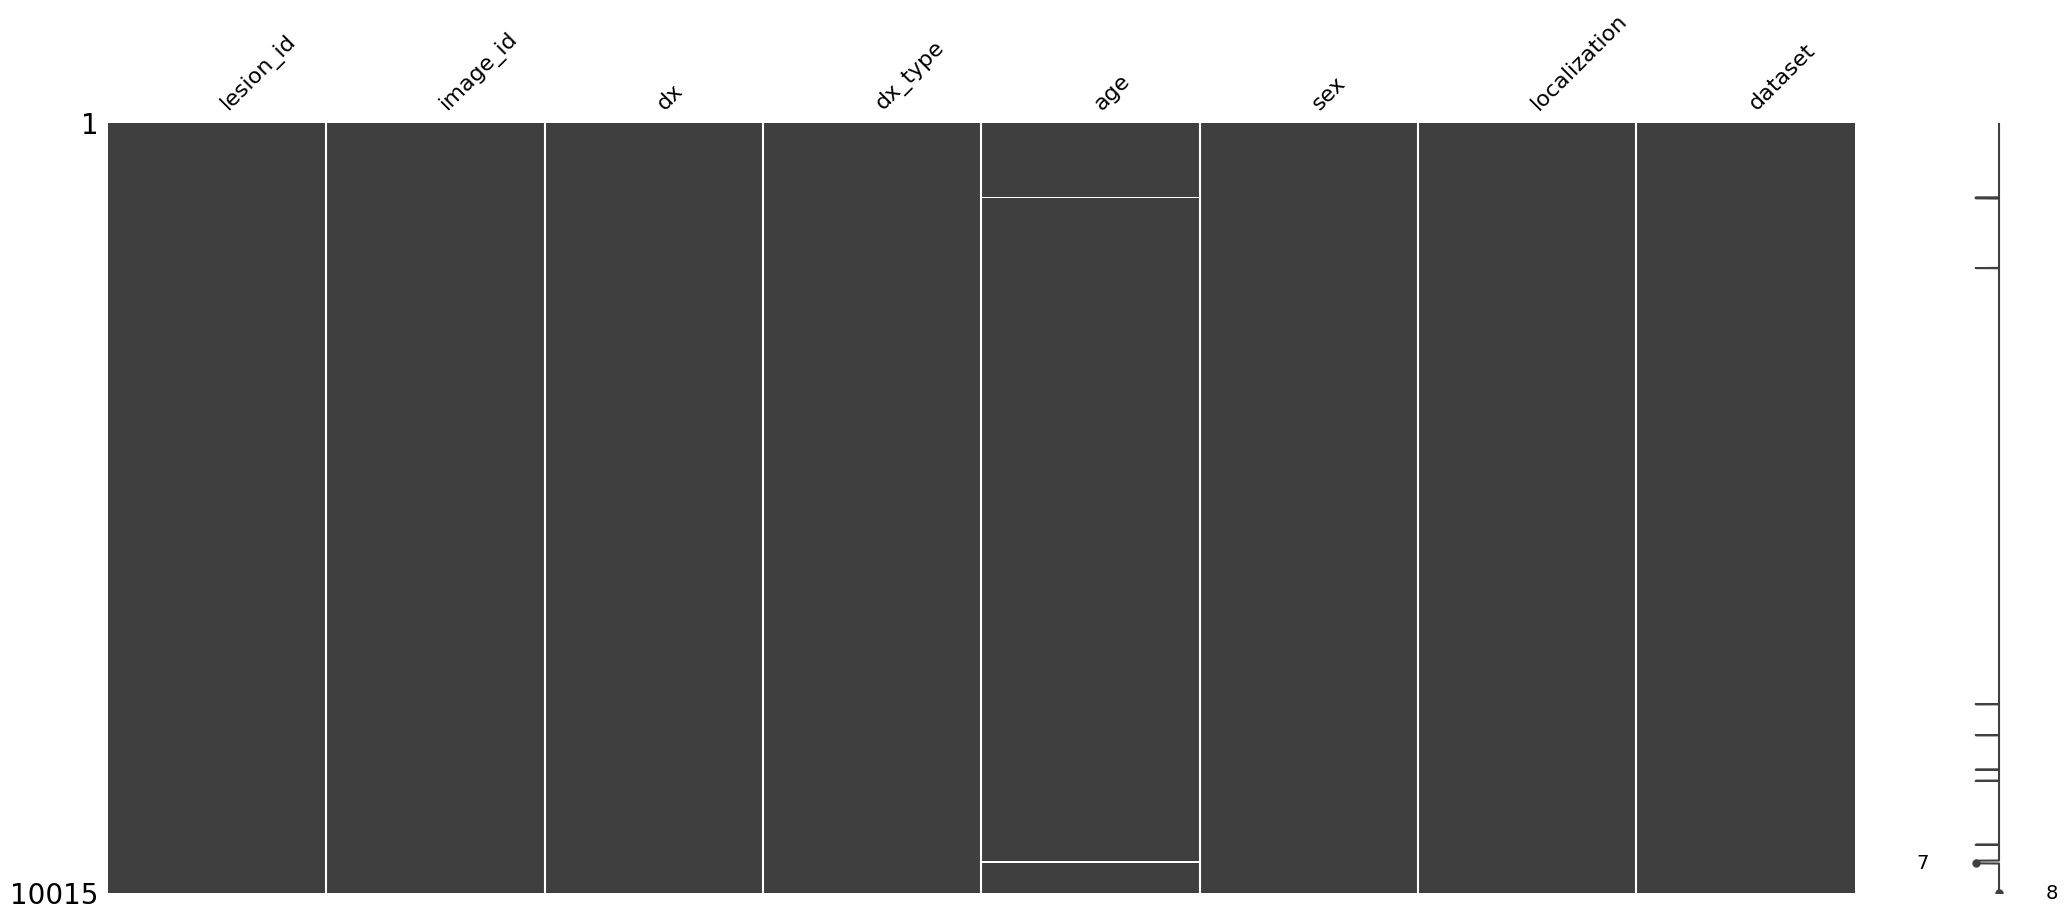

In [22]:
#visualize missing values
msno.matrix(dataframe)

In [23]:
# show missing rows in age column
dataframe[dataframe['age'].isnull()]

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
968,HAM_0001186,ISIC_0033391,bkl,consensus,NaN,unknown,unknown,vidir_modern
969,HAM_0002660,ISIC_0033750,bkl,consensus,NaN,unknown,unknown,vidir_modern
970,HAM_0000372,ISIC_0033685,bkl,consensus,NaN,unknown,unknown,vidir_modern
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown,vidir_modern
972,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,unknown,unknown,vidir_modern
973,HAM_0007281,ISIC_0034283,bkl,consensus,NaN,unknown,unknown,vidir_modern
974,HAM_0001561,ISIC_0032740,bkl,consensus,NaN,unknown,unknown,vidir_modern
975,HAM_0000825,ISIC_0034186,bkl,consensus,NaN,unknown,unknown,vidir_modern
977,HAM_0006074,ISIC_0034252,bkl,consensus,NaN,unknown,unknown,vidir_modern
978,HAM_0006074,ISIC_0033829,bkl,consensus,NaN,unknown,unknown,vidir_modern


In [24]:
#show count of missing rows in age column
dataframe[dataframe['age'].isnull()].count()

lesion_id       57
image_id        57
dx              57
dx_type         57
age              0
sex             57
localization    57
dataset         57
dtype: int64

#### Solution Problem 2:

In [25]:
# replace NaN with the mean of the age column
#df_filled = dataframe['age'].fillna((dataframe['age'].mean()), inplace=True)

solve later

### Distribution of classes

#### 1) Distribution of diagnosis

<Axes: xlabel='dx', ylabel='Count'>

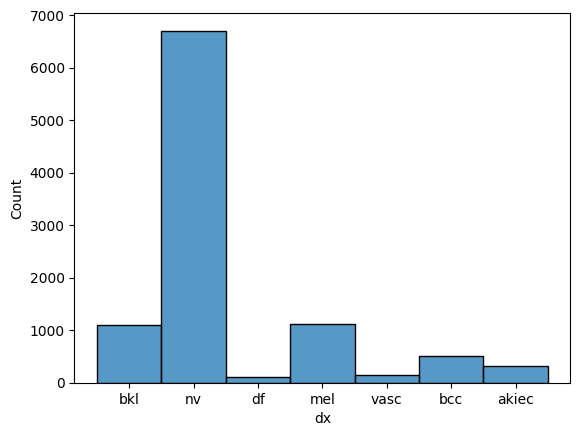

In [26]:
sns.histplot(dataframe.dx)

Target classifier is very imbalanced. We need to see if Tensorflow has problems with that. 
* Class weights - penalize the model for misclassifying minority class
* Data Augmentation - create more samples for minority class by multiple random transformations
* Resampling - create more samples for minority class by duplicating existing samples (SMOTE,variational autoencoders)
* Evaluation Metrics - Accuracy is not a good metric for imbalanced datasets. We can use F1 score, precision, recall, AUC etc.

Solutions: Subset of equal amount of images, anomaly detection, image augmentation

#### 2) Distribution of location of the lesion

In [27]:
dataframe.localization.unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

Classes like trunk include chest,back,abdomen,genital and might overlap with upper extremity. We might need to decide where to classify these lesions. Maybe we can agglumerate all these classes into one class called trunk.

Maybe we can agglumerate some classes together like face and ear etc.


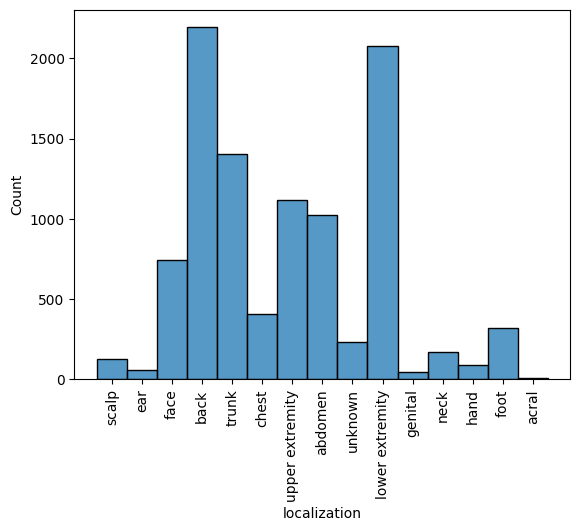

In [28]:
# histplot of localization
sns.histplot(dataframe.localization)
plt.xticks(rotation=90)
plt.show()

correlation between cancerous / non-cancerous vs the location found

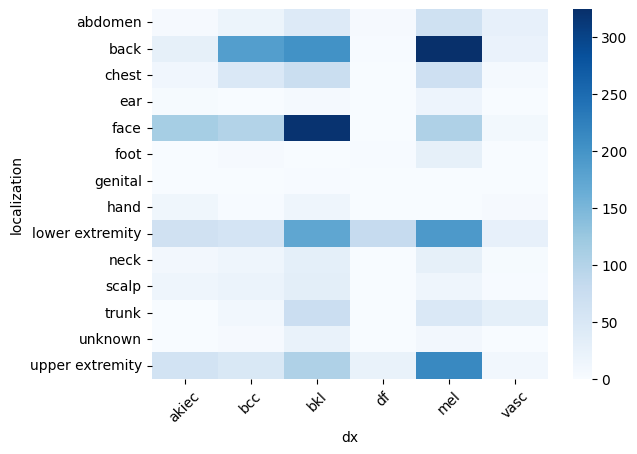

In [29]:
# correlation between localization and type of lesion
# dropping nv because of the high number of entries

# plot localization vs dx except for nv
sns.heatmap(pd.crosstab(dataframe.localization, dataframe.dx[dataframe.dx != 'nv']), cmap='Blues')
#sns.heatmap(pd.crosstab(dataframe.localization, dataframe.dx), cmap='Blues')
plt.xticks(rotation=45)
plt.show()

#### 3) Distribution of Age and Sex

<Axes: xlabel='sex', ylabel='Count'>

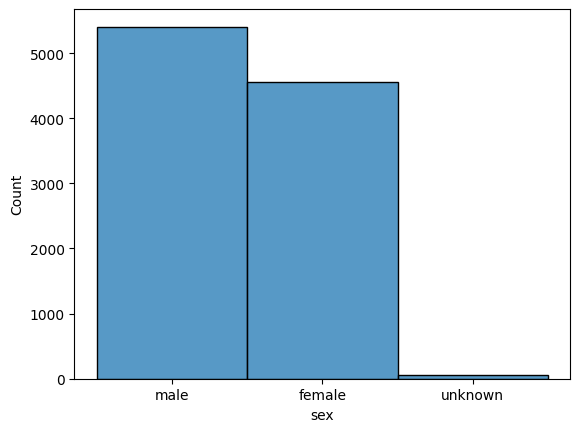

In [30]:
# histplot of sex
sns.histplot(dataframe.sex)

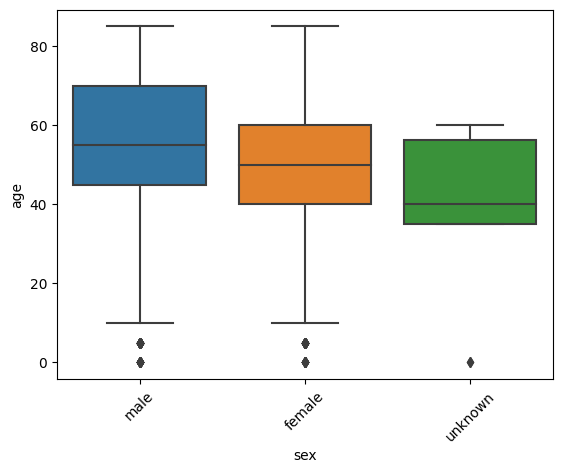

In [31]:
# plot sex vs age
sns.boxplot(x='sex', y='age', data=dataframe)
plt.xticks(rotation=45)
plt.show()

Maybe we can remove the unknown class

<Axes: xlabel='age', ylabel='Count'>

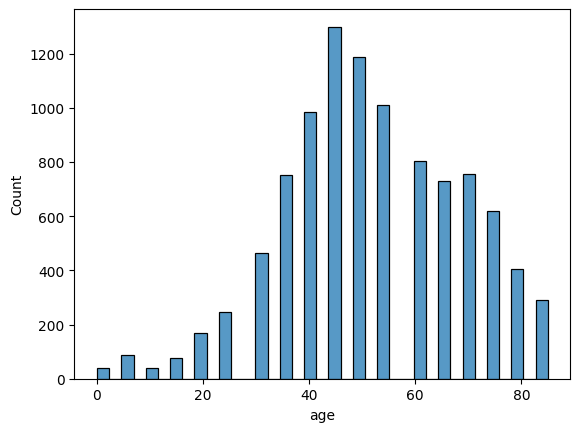

In [32]:
# histplot of age
sns.histplot(dataframe.age)

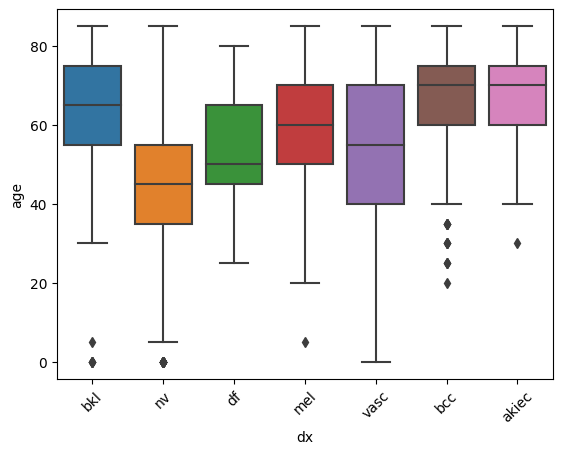

In [33]:
# plot age vs dx
sns.boxplot(x='dx', y='age', data=dataframe)
plt.xticks(rotation=45)
plt.show()

Nv and Vasc have the youngest entries and the biggest span of ages. This is probably because these are the most common skin lesions and can occur at any age.

In [34]:
# show all entries with age lower than 20
dataframe[dataframe.age < 20].count()

lesion_id       243
image_id        243
dx              243
dx_type         243
age             243
sex             243
localization    243
dataset         243
dtype: int64

Maybe set a cutoff to exclude young peoples samples

there is no clear difference between the sexes in terms of age distribution. Maybe a cutoff can be set around 20 to remove some outliers.

#### 4) Distribution of type of ground truth

<Axes: xlabel='dx_type', ylabel='Count'>

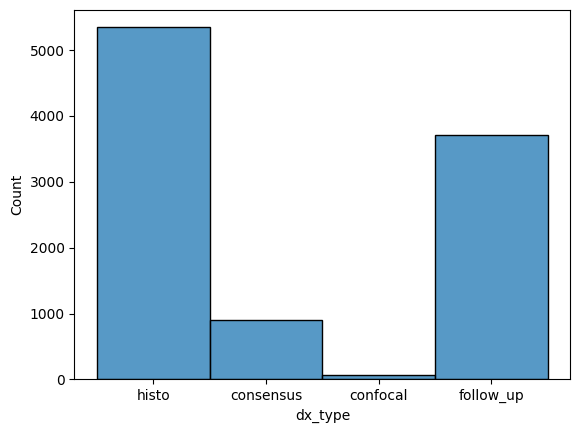

In [35]:
sns.histplot(dataframe.dx_type)

distribution between cancerous/ non cancerous
do lesion_id/image_id come up again in dx_type follow up

can think about making two classes the doctor's praxis or the laboratory(confocal/histo)

<Axes: xlabel='dataset', ylabel='Count'>

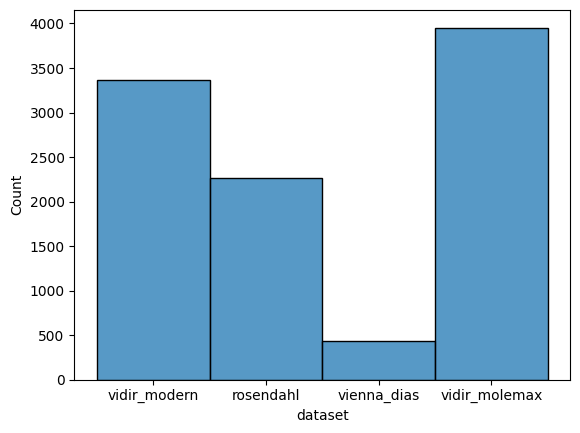

In [36]:
sns.histplot(dataframe.dataset)